In [1]:
from google.colab import drive
import os
import sys
import pandas as pd
import numpy as np
drive.mount('/content/drive/',force_remount=True)
#helper directory
sys.path.insert(0,'/content/drive/MyDrive/BackUp_RL_CodeBase/helpers')
#file directory
os.chdir('/content/drive/MyDrive/BackUp_RL_CodeBase/')
#saving directory
path = os.getcwd()
print(path)


Mounted at /content/drive/
/content/drive/MyDrive/BackUp_RL_CodeBase


# load trianing shedule


In [ ]:
schedule=pd.read_excel("trainingSchedule.xlsx",sheet_name = 'Value',index_col='Id')
schedule

,trainStart,trainEnd,trainLength,testStart,testEnd,testLength,Agent,traning,trainY,trainM,testY,note,ModelName,ModelDir,LogDir,LogFolder,ResultsRL,InSample,OutofSample
Id,,,,,,,,,,,,,,,,,,,
0.0,2014-12-31,2015-12-31,252.0,2015-12-31,2016-12-30,252.0,PPO,1000.0,1415,1212,1516,AS_D252,PPO_0_1000_1415_1212_AS_D252,/trained_models/2018/,/log_RL/,PPO_0_1000_1415_1212_AS_D252,/resultsRL/,PPO_0_InSample1415,PPO_0_OutofSample1516
1.0,2015-12-31,2016-12-30,252.0,2016-12-30,2017-12-29,252.0,PPO,1000.0,1516,1212,1617,AS_D252,PPO_1_1000_1516_1212_AS_D252,/trained_models/2018/,/log_RL/,PPO_1_1000_1516_1212_AS_D252,/resultsRL/,PPO_1_InSample1516,PPO_1_OutofSample1617
2.0,2016-12-30,2017-12-29,252.0,2017-12-29,2018-12-31,252.0,PPO,1000.0,1617,1212,1718,AS_D252,PPO_2_1000_1617_1212_AS_D252,/trained_models/2018/,/log_RL/,PPO_2_1000_1617_1212_AS_D252,/resultsRL/,PPO_2_InSample1617,PPO_2_OutofSample1718
3.0,2017-12-29,2018-12-31,252.0,2018-12-31,2019-12-31,252.0,PPO,1000.0,1718,1212,1819,AS_D252,PPO_3_1000_1718_1212_AS_D252,/trained_models/2018/,/log_RL/,PPO_3_1000_1718_1212_AS_D252,/resultsRL/,PPO_3_InSample1718,PPO_3_OutofSample1819
4.0,2018-12-31,2019-12-31,252.0,2019-12-31,2020-12-31,252.0,PPO,1000.0,1819,1212,1920,AS_D252,PPO_4_1000_1819_1212_AS_D252,/trained_models/2018/,/log_RL/,PPO_4_1000_1819_1212_AS_D252,/resultsRL/,PPO_4_InSample1819,PPO_4_OutofSample1920
5.0,2019-12-31,2020-12-31,252.0,2020-12-31,2021-12-31,252.0,PPO,1000.0,1920,1212,2021,AS_D252,PPO_5_1000_1920_1212_AS_D252,/trained_models/2018/,/log_RL/,PPO_5_1000_1920_1212_AS_D252,/resultsRL/,PPO_5_InSample1920,PPO_5_OutofSample2021


# load training results

In [ ]:
# result from 0 to 5, training from 2015 to 2020
resultDir=(schedule.LogDir + '20152020/'+ schedule.LogFolder).iloc[0]
result = pd.read_csv(f'{path}{resultDir}/progress.csv')
monitor = pd.read_csv(f'{path}{resultDir}/monitor.csv',index_col=False,skiprows=1)

In [ ]:
result

In [ ]:
# result.plot(subplots=True, layout=(5,5),figsize=(22,20))

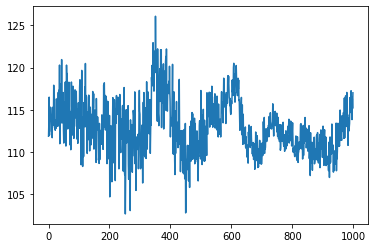

In [ ]:
(monitor.r/monitor.l*100).rolling(1).mean().plot()

In [ ]:
result

,train/reward,train/clip_range,rollout/ep_len_mean,rollout/ep_rew_mean,time/iterations,time/time_elapsed,train/learning_rate,train/explained_variance,time/fps,train/policy_gradient_loss,time/total_timesteps,train/approx_kl,train/entropy_loss,train/clip_fraction,train/loss,train/n_updates,train/value_loss,train/std
0,0.038911,0.05,258.0,293.177590,258,46,0.0001,-246.440781,27,-0.030124,1290,0.106664,-59.591110,0.84,-0.006345,2570,0.135274,0.999902
1,0.039014,0.05,258.0,294.037513,516,92,0.0001,-4.231328,27,-0.028492,2580,0.175395,-59.625895,0.72,-0.031334,5150,0.015619,1.000721
2,0.037794,0.05,258.0,293.435747,774,138,0.0001,-16.234596,27,-0.029357,3870,0.165770,-59.665409,0.76,-0.024191,7730,0.055656,1.001703
3,0.039776,0.05,258.0,294.492169,1032,184,0.0001,-1.721946,27,-0.028595,5160,0.163697,-59.626838,0.82,-0.016925,10310,0.088641,1.000802
4,0.037705,0.05,258.0,293.980893,1290,230,0.0001,-4.896726,27,-0.029558,6450,0.207596,-59.637449,0.78,-0.027823,12890,0.030669,1.001080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.040350,0.05,258.0,286.638120,50568,8803,0.0001,0.661962,28,-0.036430,252840,2.109036,-59.275924,0.90,-0.039888,505670,0.002524,0.995406
196,0.037446,0.05,258.0,286.933473,50826,8848,0.0001,0.807385,28,-0.038134,254130,1.652922,-59.250492,0.90,-0.041585,508250,0.002851,0.994832
197,0.039925,0.05,258.0,287.408082,51084,8893,0.0001,0.884000,28,-0.035411,255420,4.490583,-59.197163,0.88,-0.039328,510830,0.000223,0.993591
198,0.038322,0.05,258.0,288.037380,51342,8938,0.0001,0.835454,28,-0.038220,256710,1.946362,-59.212917,0.90,-0.042348,513410,0.000577,0.993836


# Aggregate Reward from Monitor File

In [ ]:
# result from 0 to 5, training from 2015 to 2020
df_all_monitor = pd.DataFrame(columns=['2015','2016','2017','2018','2019','2020'])
for i in range(6):
  resultDir=(schedule.LogDir + '20152020/'+ schedule.LogFolder).iloc[i]
  monitori = pd.read_csv(f'{path}{resultDir}/monitor.csv',index_col=False,skiprows=1)
  reward = np.round(monitori.r/monitori.l *100,2)
  col = df_all_monitor.columns[i] 
  df_all_monitor[col]= reward
  # df_all_monitor = df_all_monitor.append(monitori,ignore_index=True)

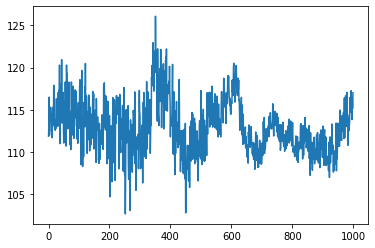

In [ ]:
df_all_monitor['2015'].rolling(1).mean().plot()

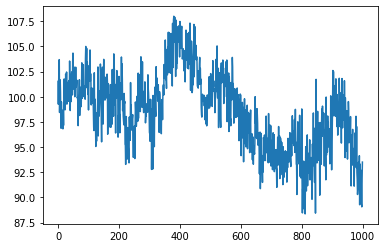

In [ ]:
df_all_monitor['2016'].rolling(1).mean().plot()

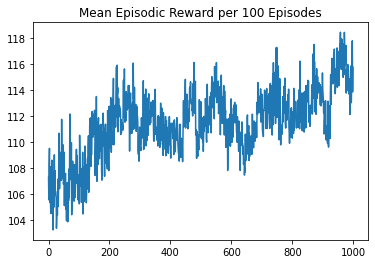

In [ ]:
df_all_monitor['2017'].rolling(1).mean().plot(title='Mean Episodic Reward per 100 Episodes')

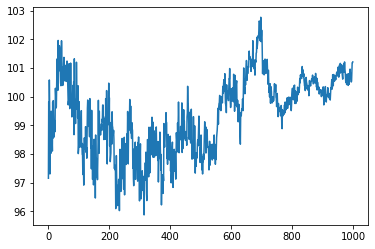

In [ ]:
df_all_monitor['2018'].rolling(1).mean().plot()

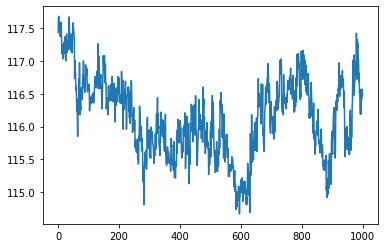

In [ ]:
df_all_monitor['2019'].rolling(1).mean().plot()